C:\Users\arann\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


   Unnamed: 0 default student      balance        income
0           1      No      No   729.526495  44361.625074
1           2      No     Yes   817.180407  12106.134700
2           3      No      No  1073.549164  31767.138947
3           4      No      No   529.250605  35704.493935
4           5      No      No   785.655883  38463.495879
Matriz de Confusión:
 [[2897    9]
 [  70   24]]

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2906
           1       0.73      0.26      0.38        94

    accuracy                           0.97      3000
   macro avg       0.85      0.63      0.68      3000
weighted avg       0.97      0.97      0.97      3000


AUC: 0.947050123735192


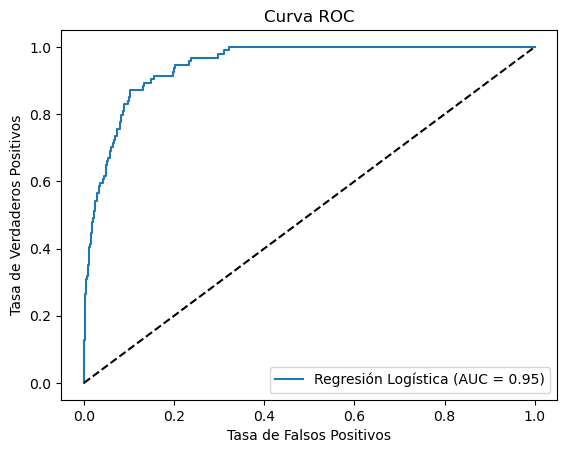


Coeficientes del modelo: [[ 0.03205718  2.6292845  -0.53975782]]
Intercepto del modelo: [-5.7261712]


In [3]:
#Descripción del Conjunto de Datos: Características: balance, income, y student Variable objetivo: 
#default (si el cliente incumple el préstamo) • Preparación de Datos: Cargamos y escalamos las 
#características numéricas. Realizamos una división entre conjunto de entrenamiento y conjunto de prueba. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Importa LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. Carga de datos
# url = "https://github.com/JWarmenhoven/ISLRpython/raw/master/Notebooks/Data/Default.xlsx"
# df = pd.read_excel(url)
df = pd.read_excel("Default.xlsx")

# 2. Exploración inicial (df.head(), df.info(), df.describe(), df['default'].value_counts())
print(df.head())
# 3. Preprocesamiento de datos
# Codificar la variable 'student' usando LabelEncoder
le = LabelEncoder()
df['student_encoded'] = le.fit_transform(df['student'])
df = df.drop('student', axis=1) # Eliminar la columna original

# Definir variables predictoras (X) y variable objetivo (y)
X = df[['income', 'balance', 'student_encoded']] # Ajusta las columnas según tu análisis
y = df['default'].apply(lambda x: 1 if x == 'Yes' else 0) # Asegúrate de que la variable objetivo sea numérica (0 o 1)

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Escalado de variables numéricas (opcional)
scaler = StandardScaler()
X_train[['income', 'balance']] = scaler.fit_transform(X_train[['income', 'balance']])
X_test[['income', 'balance']] = scaler.transform(X_test[['income', 'balance']])

# 6. Entrenamiento del modelo de regresión logística
model = LogisticRegression(solver='liblinear') # Puedes probar diferentes solvers
model.fit(X_train, y_train)

# 7. Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva (incumplimiento)

# 8. Evaluación del modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))
print("\nAUC:", roc_auc_score(y_test, y_prob))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Regresión Logística (AUC = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# 9. Interpretación del modelo (opcional)
print("\nCoeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

In [9]:
#Preparación de Datos: Cargamos y escalamos las características numéricas. Realizamos una división entre conjunto de 
#entrenamiento y conjunto de prueba. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Carga del conjunto de datos
#url = "https://github.com/JWarmenhoven/ISLRpython/raw/master/Notebooks/Data/Default.xlsx"
#df = pd.read_excel(url)
df = pd.read_excel("Default.xlsx")
# 2. Codificación de la variable categórica 'student'
le = LabelEncoder()
df['student_encoded'] = le.fit_transform(df['student'])
df = df.drop('student', axis=1)

# 3. Definición de características (X) y variable objetivo (y)
X = df[['balance', 'income', 'student_encoded']]
y = df['default'].apply(lambda x: 1 if x == 'Yes' else 0)

# 4. División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Usamos stratify=y para mantener la proporción de la variable objetivo en ambos conjuntos

# 5. Escalado de las características numéricas ('balance' e 'income')
scaler = StandardScaler()

# Ajustamos el escalador solo en el conjunto de entrenamiento y transformamos ambos conjuntos
X_train[['balance', 'income']] = scaler.fit_transform(X_train[['balance', 'income']])
X_test[['balance', 'income']] = scaler.transform(X_test[['balance', 'income']])

# Visualización de los datos escalados (opcional)
print("Conjunto de entrenamiento escalado:")
print(X_train.head())
print("\nConjunto de prueba escalado:")
print(X_test.head())

print("\nForma del conjunto de entrenamiento (características):", X_train.shape)
print("Forma del conjunto de prueba (características):", X_test.shape)
print("Forma del conjunto de entrenamiento (objetivo):", y_train.shape)
print("Forma del conjunto de prueba (objetivo):", y_test.shape)

C:\Users\arann\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Conjunto de entrenamiento escalado:
       balance    income  student_encoded
746  -0.038225 -1.311269                1
3688 -0.770051  0.736982                0
8505 -1.058305  0.350703                0
3381 -0.114169  0.301760                0
2868  0.846949  0.345072                0

Conjunto de prueba escalado:
       balance    income  student_encoded
7288  0.717916 -1.150642                1
6310  0.013469 -0.712269                0
3912 -1.744888 -1.126421                1
6386  2.178930  1.046237                0
5633  0.315036 -0.852390                1

Forma del conjunto de entrenamiento (características): (7000, 3)
Forma del conjunto de prueba (características): (3000, 3)
Forma del conjunto de entrenamiento (objetivo): (7000,)
Forma del conjunto de prueba (objetivo): (3000,)


In [11]:
from sklearn.linear_model import LogisticRegression

# 1. Inicialización del modelo de Regresión Logística

model = LogisticRegression(solver='liblinear', random_state=42)

# 2. Ajuste del modelo a los datos de entrenamiento
model.fit(X_train, y_train)

print("Modelo de Regresión Logística entrenado.")

Modelo de Regresión Logística entrenado.


In [13]:
#Aplicación del Modelo: Calculamos las probabilidades y predicciones utilizando el modelo entrenado. 
import numpy as np

# 1. Cálculo de las probabilidades
# El método .predict_proba() devuelve un array con dos columnas:
# - La probabilidad de la clase 0 (no incumplimiento)
# - La probabilidad de la clase 1 (incumplimiento)
y_prob = model.predict_proba(X_test)

# Nos interesa la probabilidad de la clase positiva (incumplimiento), que está en la segunda columna
y_prob_default = y_prob[:, 1]

# Imprimimos las primeras 10 probabilidades de incumplimiento
print("Primeras 10 probabilidades de incumplimiento:")
print(y_prob_default[:10])

# 2. Realización de las predicciones basadas en un umbral
# El umbral por defecto para .predict() es 0.5. Si la probabilidad de incumplimiento
# es mayor o igual a 0.5, se predice que el cliente incumple (clase 1), de lo contrario, no (clase 0).
y_pred = model.predict(X_test)

# Imprimimos las primeras 10 predicciones
print("\nPrimeras 10 predicciones (umbral = 0.5):")
print(y_pred[:10])

# También podemos aplicar un umbral diferente si es necesario
umbral = 0.3  # Ejemplo de un umbral diferente
y_pred_umbral = np.where(y_prob_default >= umbral, 1, 0)

print(f"\nPrimeras 10 predicciones (umbral = {umbral}):")
print(y_pred_umbral[:10])

Primeras 10 probabilidades de incumplimiento:
[1.16708132e-02 3.51706907e-03 1.87866456e-05 5.03990093e-01
 4.09673573e-03 3.37351373e-04 7.30552567e-01 2.47469961e-03
 1.34550823e-02 1.49847174e-02]

Primeras 10 predicciones (umbral = 0.5):
[0 0 0 1 0 0 1 0 0 0]

Primeras 10 predicciones (umbral = 0.3):
[0 0 0 1 0 0 1 0 0 0]


In [15]:
#5.	Evaluación del Modelo: Evaluamos el rendimiento del modelo mediante la matriz de confusión y el informe de clasificación. 
from sklearn.metrics import confusion_matrix, classification_report
# 1. Cálculo de la Matriz de Confusión
# Comparamos las etiquetas verdaderas del conjunto de prueba (y_test) con las
# predicciones realizadas por el modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# 2. Generación del Informe de Clasificación
# El informe de clasificación proporciona métricas de precisión, recall, puntuación F1 y soporte
# para cada clase.
report = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(report)


Matriz de Confusión:
[[2885   15]
 [  68   32]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2900
           1       0.68      0.32      0.44       100

    accuracy                           0.97      3000
   macro avg       0.83      0.66      0.71      3000
weighted avg       0.97      0.97      0.97      3000



In [33]:
#Calculamos métricas como precisión, sensibilidad, especificidad y puntuación de precisión general. 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

# 1. Calcular la matriz de confusión (si no la tienes ya)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Extraer los valores de la matriz de confusión
TN, FP, FN, TP = cm.ravel()

# 2. Calcular la precisión
precision = precision_score(y_test, y_pred)
print(f"\nPrecisión: {precision:.4f}")
# También se puede calcular como: TP / (TP + FP)

# 3. Calcular la sensibilidad (Recall)
sensitivity = recall_score(y_test, y_pred)
print(f"Sensibilidad (Recall): {sensitivity:.4f}")
# También se puede calcular como: TP / (TP + FN)

# 4. Calcular la especificidad
specificity = TN / (TN + FP)
print(f"Especificidad: {specificity:.4f}")

# 5. Calcular la exactitud (Puntuación de Precisión General)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy): {accuracy:.4f}")
# También se puede calcular como: (TP + TN) / (TP + TN + FP + FN)

Matriz de Confusión:
[[2885   15]
 [  68   32]]

Precisión: 0.6809
Sensibilidad (Recall): 0.3200
Especificidad: 0.9948
Exactitud (Accuracy): 0.9723


In [35]:
#7.	Informe de Resultados: Presentamos los resultados del modelo tanto usando sklearn como statsmodels, 
#y comparamos los resultados obtenidos con ambos enfoques. 
#el resultado con scikit-learn ya se realizo anteriormente 
import statsmodels.api as sm

# Añadir una constante al conjunto de entrenamiento y prueba para el intercepto
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Ajustar el modelo de regresión logística usando statsmodels
# La variable dependiente (y_train) debe ser la primera
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Imprimir el resumen de los resultados
print("\nResumen del Modelo de Regresión Logística con Statsmodels:")
print(result.summary())

# Obtener las predicciones de probabilidad del modelo de statsmodels en el conjunto de prueba
y_prob_sm = result.predict(X_test_sm)

# Convertir las probabilidades a predicciones de clase (usando un umbral de 0.5)
y_pred_sm = (y_prob_sm >= 0.5).astype(int)

# Evaluar el modelo de statsmodels (podríamos recalcular las métricas para comparar directamente)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nMatriz de Confusión con Statsmodels:")
print(confusion_matrix(y_test, y_pred_sm))

print("\nInforme de Clasificación con Statsmodels:")
print(classification_report(y_test, y_pred_sm))

print(f"\nExactitud (Accuracy) con Statsmodels: {accuracy_score(y_test, y_pred_sm):.4f}")

Optimization terminated successfully.
         Current function value: 0.078110
         Iterations 10

Resumen del Modelo de Regresión Logística con Statsmodels:
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.4649
Time:                        18:08:19   Log-Likelihood:                -546.77
converged:                       True   LL-Null:                       -1021.9
Covariance Type:            nonrobust   LLR p-value:                1.119e-205
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.0193      0.233